In [6]:
import pandas as pd
df = pd.read_csv("dataset/DelayedFlights.csv")


In [7]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [30]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed'],
      dtype='object')

In [31]:
print(df.head(5))

    Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
3            4  2008      1           3          4   1829.0        1755   
5            6  2008      1           3          4   1937.0        1830   
7           11  2008      1           3          4   1644.0        1510   
9           16  2008      1           3          4   1452.0        1425   
11          18  2008      1           3          4   1323.0        1255   

    ArrTime  CRSArrTime UniqueCarrier  ...  TaxiOut Cancelled  \
3    1959.0        1925            WN  ...     10.0         0   
5    2037.0        1940            WN  ...      7.0         0   
7    1845.0        1725            WN  ...      8.0         0   
9    1640.0        1625            WN  ...      8.0         0   
11   1526.0        1510            WN  ...      9.0         0   

    CancellationCode  Diverted  CarrierDelay  WeatherDelay  NASDelay  \
3                  N         0           2.0           0.0       0.0   
5             

In [8]:
# Drop missing values
df = df.dropna()

# Create binary target: 1 = delayed (> 15 mins)
df['Delayed'] = (df['DepDelay'] > 15).astype(int)

# Select features
features = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime', 'Distance']
target = 'Delayed'

X = df[features]
y = df[target]

In [9]:
from sklearn.model_selection import train_test_split

X_ref, X_curr, y_ref, y_curr = train_test_split(X, y, test_size=0.5, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_ref, y_ref)

# Predict on current dataset
y_pred = model.predict(X_curr)


Delayed
1    0.87647
0    0.12353
Name: proportion, dtype: float64
              Month    DayofMonth     DayOfWeek       DepTime       ArrTime  \
count  1.247486e+06  1.247486e+06  1.247486e+06  1.247486e+06  1.247486e+06   
mean   6.065399e+00  1.572542e+01  3.980082e+00  1.558832e+03  1.616749e+03   
std    3.508937e+00  8.793008e+00  1.993270e+00  4.543300e+02  5.839416e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    3.000000e+00  8.000000e+00  2.000000e+00  1.232000e+03  1.326000e+03   
50%    6.000000e+00  1.600000e+01  4.000000e+00  1.618000e+03  1.737000e+03   
75%    9.000000e+00  2.300000e+01  6.000000e+00  1.924000e+03  2.048000e+03   
max    1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03  2.400000e+03   

           Distance  
count  1.247486e+06  
mean   7.415867e+02  
std    5.593643e+02  
min    1.100000e+01  
25%    3.340000e+02  
50%    5.950000e+02  
75%    9.720000e+02  
max    4.962000e+03  


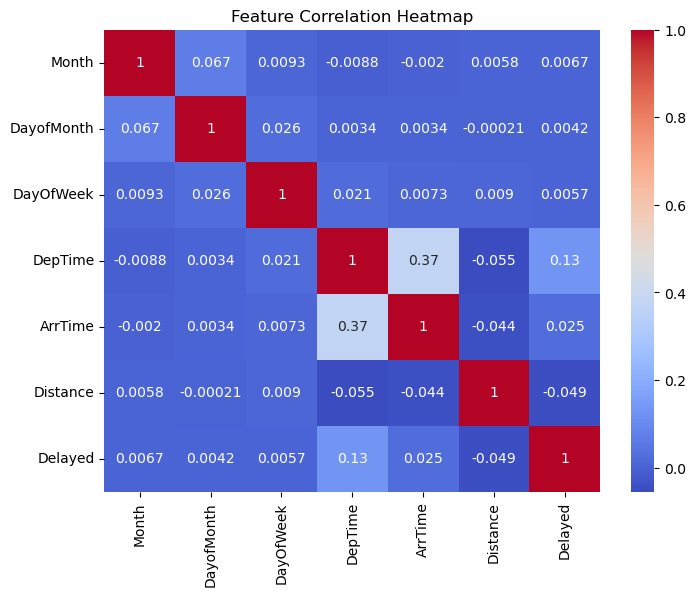

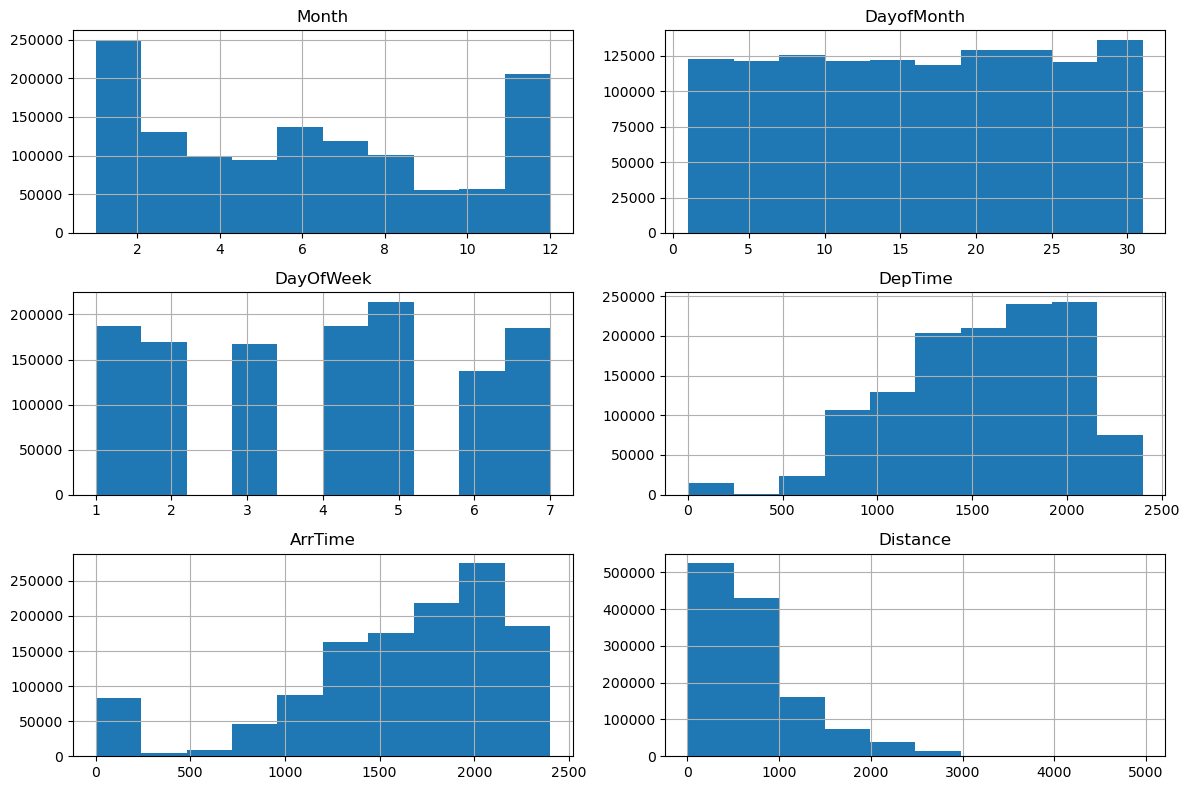

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
print(y.value_counts(normalize=True))

# Feature statistics
print(X.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Histograms
X.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [24]:
!nvidia-smi

Sat May  3 01:37:16 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:01:00.0  On |                  N/A |
| 36%   32C    P8              35W / 370W |    453MiB / 24576MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [25]:
import pandas as pd
from evidently import Report
from evidently import Dataset, DataDefinition
from evidently.descriptors import Sentiment, TextLength, Contains
from evidently.presets import TextEvals

In [21]:
from cuml.ensemble import RandomForestClassifier

In [15]:
from evidently import Report
from evidently.presets import DataDriftPreset
from evidently.presets import ClassificationPreset

In [35]:
# Reference dataset
ref_df = X_ref.copy()
ref_df["target"] = y_ref.values  # true label
ref_df["prediction"] = model.predict(X_ref)  # predict back on ref (optional)

# Current dataset
curr_df = X_curr.copy()
curr_df["target"] = y_curr.values  # true label
curr_df["prediction"] = y_pred  # already predicted above

In [61]:
from evidently import Dataset
from evidently import DataDefinition
from evidently import MulticlassClassification
from evidently import BinaryClassification

In [63]:
eval_data = Dataset.from_pandas(
    pd.DataFrame(df),
    data_definition=DataDefinition()
)

ref_dataset = Dataset.from_pandas(X_ref, data_definition=DataDefinition())
curr_dataset = Dataset.from_pandas(X_curr, data_definition=DataDefinition())

In [67]:
definition = DataDefinition(
    classification=[BinaryClassification(
        target="target",
        prediction_labels="prediction")],
    categorical_columns=["target", "prediction"])

In [69]:
report = Report(metrics=[ClassificationPreset()])
report.run(reference_data=ref_dataset, current_data=curr_dataset)
report.save_html("evidently_classification_report.html")

ValueError: Cannot use ClassificationPreset without a classification configration

In [49]:
import pandas as pd
from evidently import Report
from evidently.metric_preset import ClassificationPreset
from evidently.column_mapping import ColumnMapping

# Prepare DataFrames
ref_data = X_ref.copy()
ref_data['target'] = y_ref
ref_data['prediction'] = model.predict(X_ref)

curr_data = X_curr.copy()
curr_data['target'] = y_curr
curr_data['prediction'] = y_pred

# Create column mapping
column_mapping = ColumnMapping(
    target="target",
    prediction="prediction",
    numerical_features=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime', 'Distance']
)

# Create and run report
report = Report(metrics=[ClassificationPreset()])
report.run(
    reference_data=ref_data,
    current_data=curr_data,
    column_mapping=column_mapping
)

# Save report
report.save_html("evidently_classification_report.html")


ModuleNotFoundError: No module named 'evidently.metric_preset'

In [53]:
from evidently.column_mapping import ColumnMapping

# Prepare DataFrames
ref_data = X_ref.copy()
ref_data['target'] = y_ref
ref_data['prediction'] = model.predict(X_ref)

curr_data = X_curr.copy()
curr_data['target'] = y_curr
curr_data['prediction'] = y_pred

# Create column mapping
column_mapping = ColumnMapping(
    target="target",
    prediction="prediction",
    numerical_features=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime', 'Distance']
)

# Create and run report
report = Report(metrics=[ClassificationPreset()])
report.run(
    reference_data=ref_data,
    current_data=curr_data,
    column_mapping=column_mapping
)

# Save report
report.save_html("evidently_classification_report.html")


ModuleNotFoundError: No module named 'evidently.column_mapping'

In [ ]:
# Combine features and target for both datasets
ref_data = X_ref.copy()
ref_data['Delayed'] = y_ref

curr_data = X_curr.copy()
curr_data['Delayed'] = y_curr

# Initialize and run the data drift report
drift_report = Report(metrics=[DataDriftPreset()])
drift_report.run(reference_data=ref_data, current_data=curr_data)

# Save the report as an HTML file
drift_report.save_html("data_drift_report.html")

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, "random_forest_model.pkl")

# Load the model from the file
# model = joblib.load("random_forest_model.pkl")